# Investigating a Dataset- The Titanic Dataset

## Overview

This report is based on the sample of the Titanic dataset provided by Kaggle. The report will analyse the passenger and demographic information in python using its numpy and pandas libraries. 

Before I can pose any questions, I need to take a look at the data set by initially loading it into a pandas dataframe.

In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic_data.csv', header = 0)

In [29]:
print df.head(5)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


The data appears to have been read correctly into the 'df' dataframe.

In [30]:
print df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


The data types are as expected, however further investigation is required to ensure that there are no erroneous or missing values within these columns.

At this point I would like to add the the Parch (number of parents and children) column and SibSp (number of siblings and spouses) column to give total family values for each passenger.

In [31]:
df['total_family']=df.SibSp + df.Parch 

In [32]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
total_family    891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB
None


Most columns contain complete data. The exceptions are Age, Cabin and Embarked. 

In [33]:
print df.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  total_family  
count  891.000000  891.000000    891.000000  
mean     0.381594   32.204208      0.904602  
std      0.806057   49.693429      1.613459  
min      0.000000    0.000000      0.000000  
25%      0.000000    7.910400      0.000000  
50%      0.000000   14.454200      0.000000  
75%      0.000000   31.000000      1.000000  
m

From the summary data above, the mean survival rate is 0.38, implying that most people did not survive. The average age of the passengers was 29.7 (ignoring missing values) and there appears to have been some large families on board.

Going through the data in order to look for any erroneous values or outliers:

1. Survived - entries are either 0 or 1 (and I know this column is of type 'int')
2. Pclass - min 1, max 3 (and I know this column is of type 'int')
3. Age - the range seems reasonable
4. SibSp, Parch and total_family - again, the range seems reasonable
5. Fare - It looks as though someone paid $512 to be on board however this may be an error.

Aside from the fare column, the data looks to be in good shape.

### Data Wrangling

Since I may require the Age column as part of my analysis, and since there are missing values in this column, I will need to clean the data up before I can begin my analysis.

Here, I can either replace the missing Age entries or delete them.

I will initially look at the spread of the data.

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show>

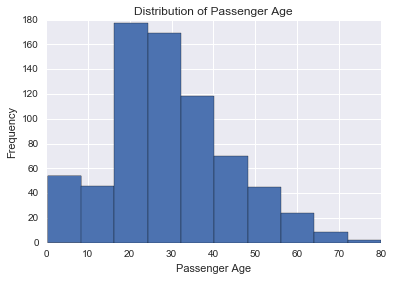

In [34]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

df['Age'].hist()
plt.xlabel('Passenger Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Age')
plt.show

Looking at the above histogram (and taking the standard deviation of the age into account), the data is reasonably well spread out. 

I could replace the missing entries with the mean however I do not want the assumption I have placed on the missing 'Age' data to affect my findings, it may not be a reasonable assumption to make due to the fact that the data is spread out. Removing the missing data will still leave me with most of the data left for my analysis.

I will therefore create a new dataframe excluding the missing 'Age' data. This dataframe should contain 714 entries.

In [35]:
new_df = df.dropna(subset=['Age'])

In [36]:
print new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
PassengerId     714 non-null int64
Survived        714 non-null int64
Pclass          714 non-null int64
Name            714 non-null object
Sex             714 non-null object
Age             714 non-null float64
SibSp           714 non-null int64
Parch           714 non-null int64
Ticket          714 non-null object
Fare            714 non-null float64
Cabin           185 non-null object
Embarked        712 non-null object
total_family    714 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 78.1+ KB
None


In [37]:
print new_df.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   714.000000  714.000000  714.000000  714.000000  714.000000   
mean    448.582633    0.406162    2.236695   29.699118    0.512605   
std     259.119524    0.491460    0.838250   14.526497    0.929783   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.250000    0.000000    1.000000   20.125000    0.000000   
50%     445.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.750000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    5.000000   

            Parch        Fare  total_family  
count  714.000000  714.000000    714.000000  
mean     0.431373   34.694514      0.943978  
std      0.853289   52.918930      1.483788  
min      0.000000    0.000000      0.000000  
25%      0.000000    8.050000      0.000000  
50%      0.000000   15.741700      0.000000  
75%      1.000000   33.375000      1.000000  
m

## Analysis

The key question for the titanic dataset would be 'what factors made people more likely to survive'?
From this dataset the following factors will be examined:
1. Sex
2. Age
3. Class of travel
4. Since information on families is available, the survival rate for a person travelling with family will also be examined.

I will examine the average survival rate between the variables in each category. Since Sex and Class of travel do not require grouping, they will need similar code for the analysis. I can therefore create two functions I will call for the two factors.

In [38]:
def average_survival_rate(factor):
    return new_df.groupby(factor).mean()['Survived']

In [39]:
def average_survival_chart(factor,title):
    new_df.groupby(factor).mean()['Survived'].plot(kind='bar')
    plt.title(title)
    plt.ylabel('Survival Rate')
    plt.show()

### Examining the Data: Gender

Looking at which Gender was more likely to survive:

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64


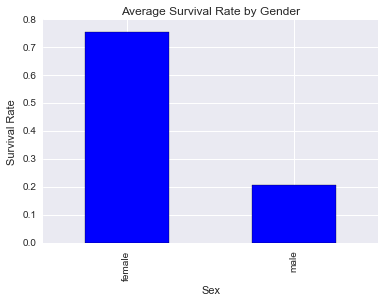

In [40]:
print average_survival_rate('Sex')
average_survival_chart('Sex','Average Survival Rate by Gender')

This shows that from our subset of data, 75% of females survived, and only 20% of males survived.
this can also be run for our original dataframe:

In [41]:
print df.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


This shows similar ratios.

### Examining the Data: Age

Now to look at the age of survivors vs the age of people who didnt survive. Firstly I'd like to look at a box plot to show the spread, mean, mediun and mode of the passengers in the dataframe.

<function matplotlib.pyplot.show>

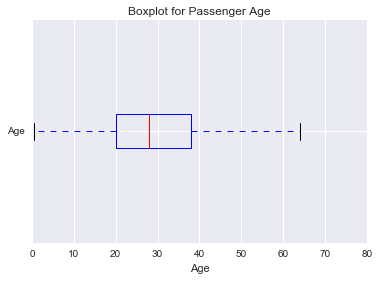

In [42]:
new_df.boxplot(column = 'Age',return_type='axes',vert=False)
plt.title('Boxplot for Passenger Age')
plt.xlabel('Age')
plt.show


Next I'd like to look at the mean age of survivors vs non-survivors and I will also show two histograms. The first showing the distribution of the age of the survivors, the second showing the distribution of the age of those that didnt survive.

The mean age of survivors was 28.34
The mean age of those that did not survive was 30.63


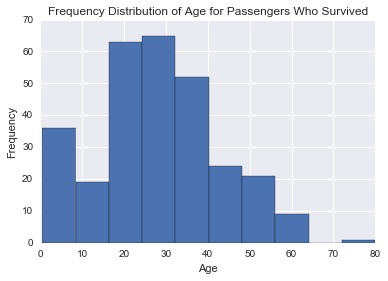

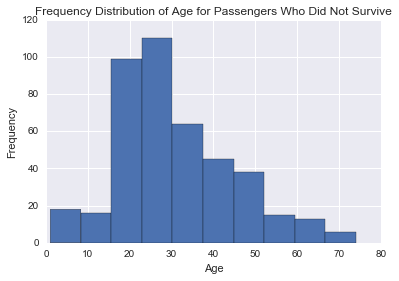

In [43]:
print 'The mean age of survivors was', np.round(new_df['Age'][(new_df['Survived'] == 1)].mean(),2)
print 'The mean age of those that did not survive was', np.round(new_df['Age'][(new_df['Survived'] == 0)].mean(),2)

survivors_hist = new_df['Age'][(new_df['Survived'] == 1)].hist()
plt.title('Frequency Distribution of Age for Passengers Who Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
show(survivors_hist)


nonsurvivors_hist = new_df['Age'][(new_df['Survived'] == 0)].hist()
plt.title('Frequency Distribution of Age for Passengers Who Did Not Survive')
plt.xlabel('Age')
plt.ylabel('Frequency')
show(nonsurvivors_hist)


The histograms and the averages show that older people were less likely to survive.

Focussing on the survivors lets look at the average survival rate for each age group. This involves grouping the age data using '.cut'.

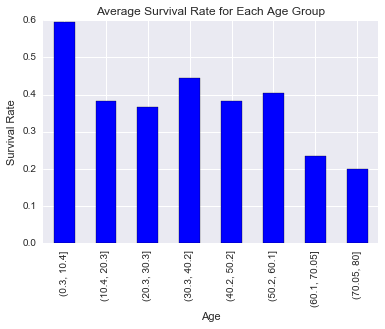

In [44]:
age_groups = new_df.groupby(pd.cut(new_df.Age,8,precision=1))
age_groups.mean()['Survived'].plot(kind='bar')
plt.ylabel('Survival Rate')
plt.title('Average Survival Rate for Each Age Group')
plt.show()


The above plot shows that most passengers under the age of 10 survived. The next highest age bracket was actually 30.3-40.2, however survival rates for all other age groups aside from the youngest was low.

### Examining the Data: Passenger Class

The following bar chart shows the average survival rate by passenger class (Pclass).

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64


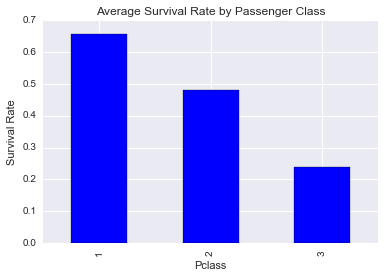

In [45]:
print average_survival_rate('Pclass')
average_survival_chart('Pclass','Average Survival Rate by Passenger Class')

As the above graph and table show, the survival rate for passengers travelling in the first class was significantly higher than the other classes.

### Examining the Data: Families

One final factor I will examine is the survival rate of passengers travelling with their families, and whether the size of the family an individual is travelling with effected their survival rate.

There are two columns that give family information, 'siblingsp' which counts siblings and partners and 'parch' with counts parents and children. I added the two columns earlier to give an approximate family size number for each person, however it should be noted, as stated in the variable descriptions this count excludes fiances, mistresses, cousins, aunts and uncles.


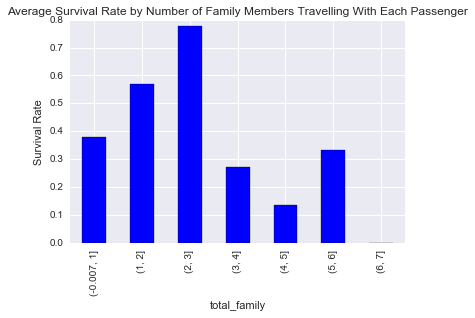

In [46]:
family_groups = new_df.groupby(pd.cut(new_df.total_family,7,precision=1))
family_groups.mean()['Survived'].plot(kind='bar')
plt.title('Average Survival Rate by Number of Family Members Travelling With Each Passenger')
plt.ylabel('Survival Rate')
plt.show()
    

Couples seem to have the largest survival rate by far.

## Conclusions

The analysis above shows that for this particular dataset, females, those under 10 years old, and those travelling in the first class were more likely to survive compared with their respective peers. Also those travelling as part of a couple were more likely to survive. However it should be noted that for this variable, assumptions have been made on the family size, since it excludes extended family.

Additionally the analysis itself does have limitations, since this is a sample of the entire data set, from which we have further reduced the dataset for passengers where their age data was missing.

Finally, a passenger being a female does not necessarily mean they will survive, and this is true for all other variables examined. The inferences made in this report remain hypothesis as to the factors which could have affected survival rates on the Titanic.

One aspect of the investigation that can be tested is my decision to remove passengers with missing age data from the analysis. Are the survival rates significantly different from one another? I will carry out a two proportion z-test to investigate this:

H0: s1 = s2	(Where s1 is the survival rate for the dataset with the missing values and s2 is the survival rate for the dataset with the missing age values removed)

H1: s1 ≠ s2

As above, the null hypothesis is that there is no significant difference between the survival rate of the complete dataset and the survival rate of the data with the missing age values removed. The alternative hypothesis states that there is a significant difference. 

I will conduct a two tailed test for alpha level 0.05.

s = (s1xn1 + s2xn2)/(n1 + n2) = (0.3838 x 891 + 0.4062 x 714)/(891+714) = 0.3938
SE = sqrt(s x (1-s) x [(1/n1)+(1/n2)] = sqrt[0.3938 x 0.6062 x (1/891+1/714)] = 0.0245
z = (s1 - s2)/SE = (0.3838 - 0.4062)/0.0245 = -0.9128

zcrit = +/- 1.96


Since z>zcrit, I accept the null hypothesis, there is no significant difference between the  survival rate of the complete dataset, and the  survival rate of the data with the missing values removed. Therefore removing the passengers with missing age data would not have significantly affected the survival rate I was examining, at alpha level 0.05.



 




Sources: Stackoverflow.com, matplotlib.org, pandas.pydata.org